[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

# Import the libraries

In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data

In [3]:
df = pd.read_csv('athlete_events.csv')
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


### drop duplicates first


In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

### Find the missing data in each column

In [7]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

### Number of males and females


In [8]:
df['Sex'].value_counts()

M    195353
F     74378
Name: Sex, dtype: int64

### How many cities do we have and what are they ?

In [9]:
df['City'].nunique(), df['City'].unique()

(42,
 array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
        'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
        'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
        'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
        'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
        'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
        'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
        'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
        'Garmisch-Partenkirchen'], dtype=object))

### Find the number of athlete for each year

In [10]:
df.groupby(['Year'])['ID'].nunique()

Year
1896      176
1900     1224
1904      650
1906      841
1908     2024
1912     2409
1920     2676
1924     3565
1928     3703
1932     2174
1936     5142
1948     5068
1952     5622
1956     4167
1960     6017
1964     6230
1968     6717
1972     8122
1976     7200
1980     6330
1984     8067
1988     9873
1992    11183
1994     1738
1996    10339
1998     2179
2000    10647
2002     2399
2004    10557
2006     2494
2008    10899
2010     2536
2012    10517
2014     2745
2016    11179
Name: ID, dtype: int64

### Which athlete participated the most? (his/her name and ID)

In [11]:
id = df['ID'].value_counts().idxmax()
name = df[df['ID'] == id]['Name'].unique()[0]
id, name

(106296, 'Heikki Ilmari Savolainen')

### Find the number of each medal for each year.

In [17]:
n_medal = df.groupby(['Year'])['Medal'].value_counts().reset_index(name='N_Medal')
n_medal.head(4)

,Year,Medal,N_Medal
0,1896,Gold,62
1,1896,Silver,43
2,1896,Bronze,38
3,1900,Silver,220


### Find the number of winners with the gold medal in each city?

In [19]:
n_gold = df[df['Medal'] == 'Gold'].groupby(['City'])['ID'].count().sort_values(ascending=True)
n_gold

City
Garmisch-Partenkirchen      36
Oslo                        45
Squaw Valley                50
Cortina d'Ampezzo           51
Chamonix                    55
Grenoble                    66
Sapporo                     70
Sankt Moritz                71
Sarajevo                    74
Calgary                     87
Albertville                104
Lake Placid                104
Lillehammer                110
Innsbruck                  131
Nagano                     145
Salt Lake City             162
St. Louis                  173
Vancouver                  174
Torino                     176
Sochi                      202
Amsterdam                  245
Melbourne                  290
Helsinki                   306
Roma                       309
Berlin                     312
Stockholm                  338
Tokyo                      347
Mexico City                359
Munich                     404
Montreal                   438
Moskva                     457
Paris                      475
Ant

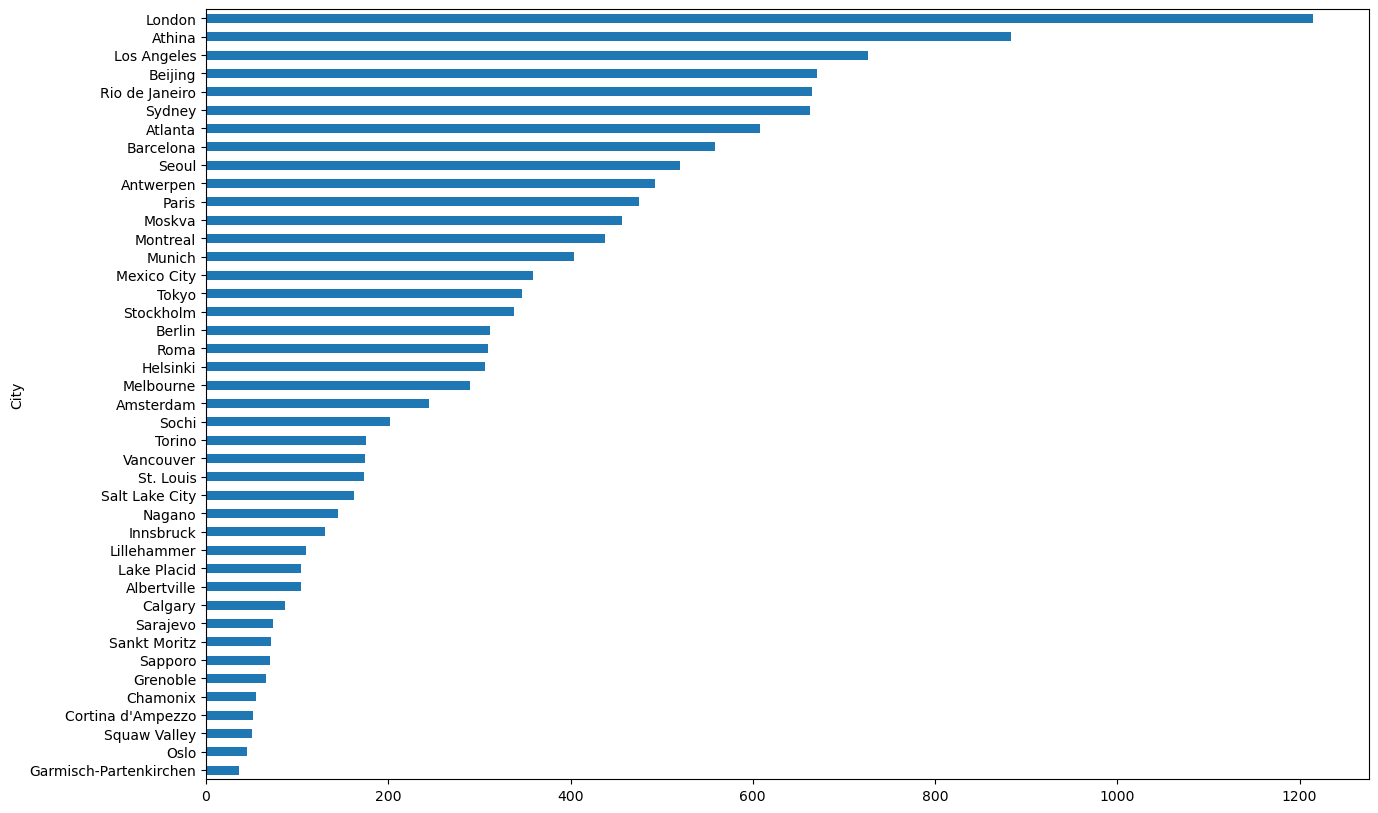

In [20]:
plt.figure(figsize=(15,10))
n_gold.plot(kind='barh');

### Find the total missing data for each year?

In [21]:
df['n_miss'] = df.isnull().sum(1)
year_most_missing = df.groupby(['Year'])['n_miss'].sum()
year_most_missing

Year
1896     1065
1900     5676
1904     3331
1906     5022
1908     8057
1912    10018
1920    11175
1924    15194
1928    14124
1932     6308
1936    18433
1948    20008
1952    22943
1956    13531
1960    10407
1964     9710
1968     9663
1972    11331
1976    10819
1980     8706
1984    11307
1988    14802
1992    20759
1994     3207
1996    15638
1998     3337
2000    12067
2002     3707
2004    11515
2006     3878
2008    11866
2010     3908
2012    11507
2014     4532
2016    12064
Name: n_miss, dtype: int64

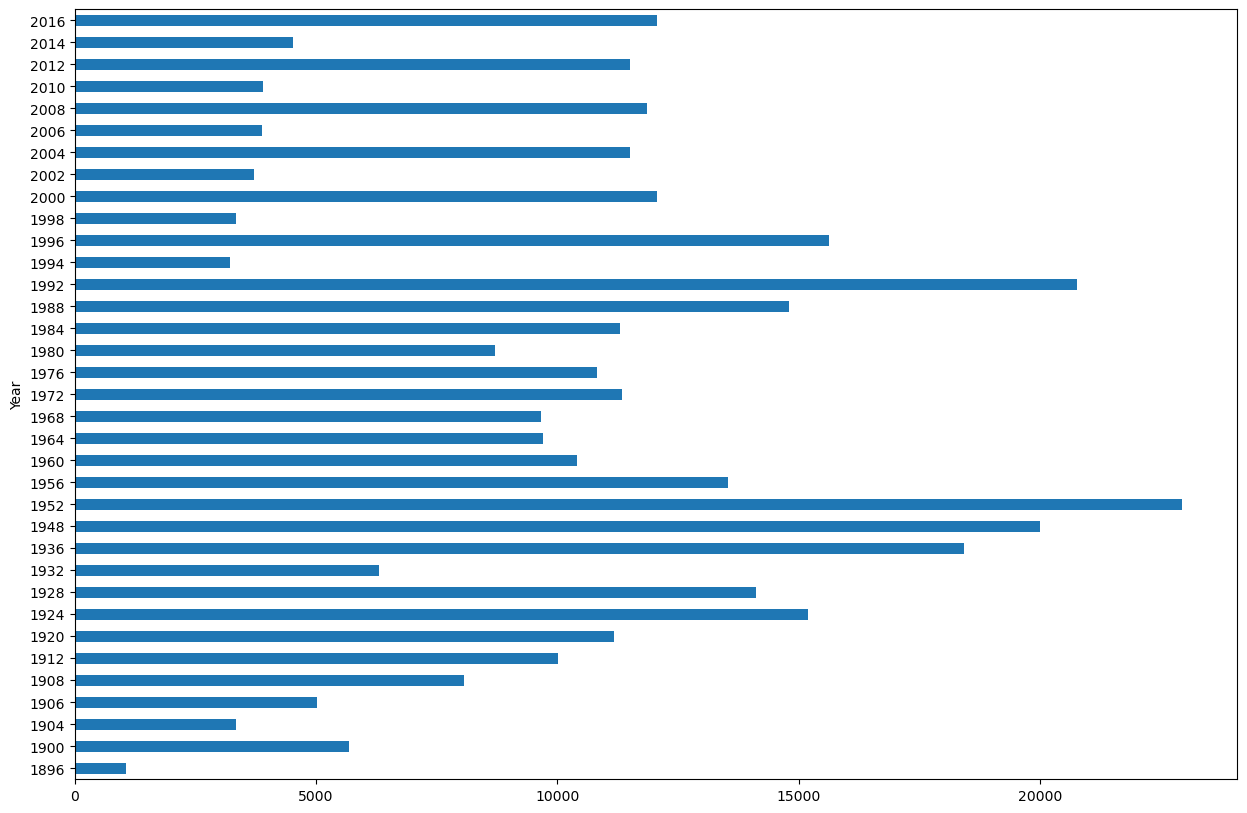

In [22]:
plt.figure(figsize=(15,10))
year_most_missing.plot(kind='barh');

### Has the number of athletes changed over time for Summer and Winter?

In [24]:
n_athletes_over_years = df.groupby(['Year', 'Season'])['ID'].nunique().sort_index(ascending=False)
n_athletes_over_years

Year  Season
2016  Summer    11179
2014  Winter     2745
2012  Summer    10517
2010  Winter     2536
2008  Summer    10899
2006  Winter     2494
2004  Summer    10557
2002  Winter     2399
2000  Summer    10647
1998  Winter     2179
1996  Summer    10339
1994  Winter     1738
1992  Winter     1801
      Summer     9386
1988  Winter     1425
      Summer     8454
1984  Winter     1273
      Summer     6798
1980  Winter     1071
      Summer     5259
1976  Winter     1128
      Summer     6073
1972  Winter     1008
      Summer     7114
1968  Winter     1160
      Summer     5558
1964  Winter     1094
      Summer     5137
1960  Winter      665
      Summer     5352
1956  Winter      821
      Summer     3347
1952  Winter      694
      Summer     4932
1948  Winter      668
      Summer     4402
1936  Winter      668
      Summer     4484
1932  Winter      252
      Summer     1922
1928  Winter      461
      Summer     3247
1924  Winter      313
      Summer     3256
1920  Summer     26

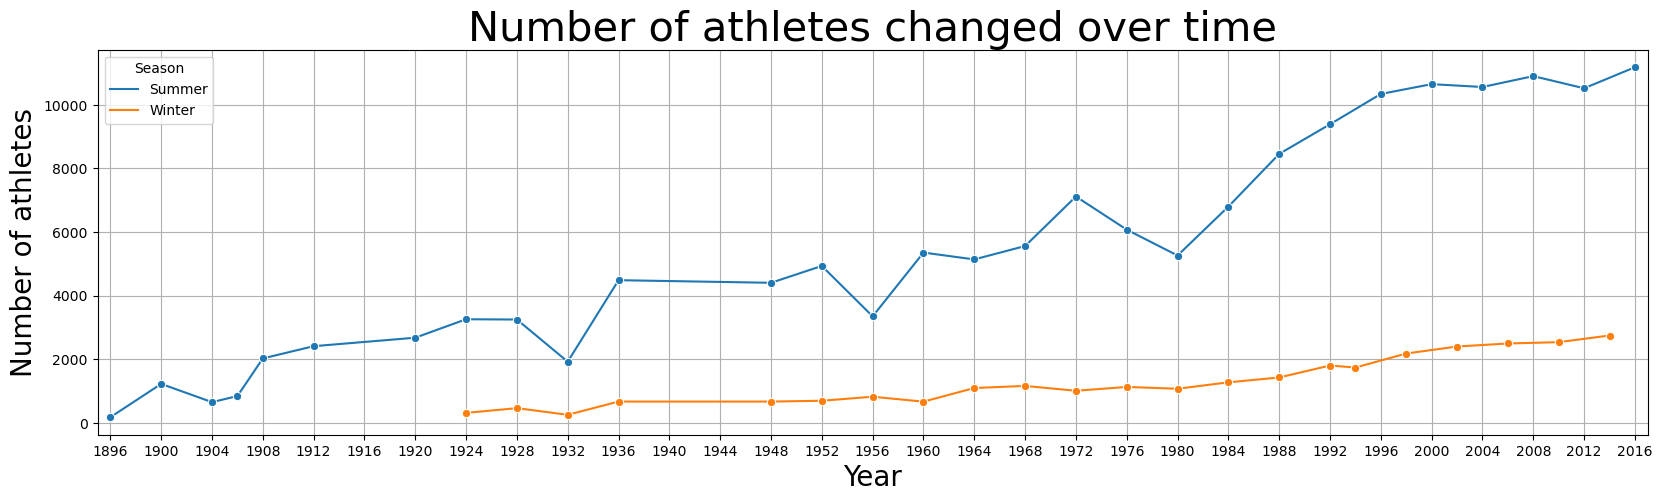

In [25]:
plt.figure(figsize=(20,5))
sns.lineplot(x=n_athletes_over_years.index.get_level_values('Year'), y=n_athletes_over_years.values, hue=n_athletes_over_years.index.get_level_values('Season'), marker='o')
plt.xlabel('Year', size=20)
plt.ylabel('Number of athletes', size=20)
plt.title('Number of athletes changed over time', size=30)
plt.xticks(list(range(1896, 2020))[::4])
plt.xlim(1895,2017)
plt.grid();